In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/ICT/diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Preprocessing

In [7]:
(data==0).sum() #Find the number of 0 values in each column

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500



# *    *Not imputing values in column 'Pregnancies' because it is ok to be 0.*





# *    *'Glucose'*



<Axes: >

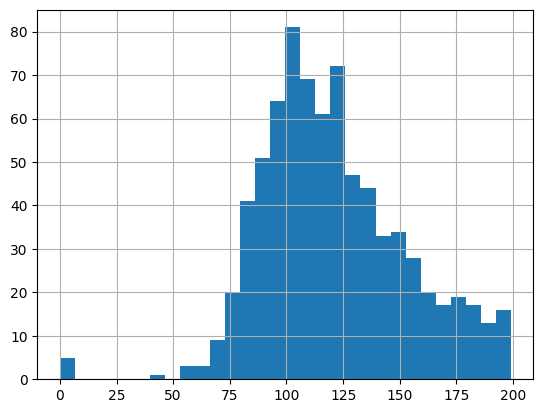

In [8]:
data['Glucose'].hist(bins=30) # Checking histogram of column 'Glucose'

In [9]:
data['Glucose'].median()

117.0

In [10]:
data['Glucose'] = data['Glucose'].replace(0,117) # Replacing 0 values with median

In [11]:
(data['Glucose'] == 0).sum()

0


# *   *'BloodPressure'*


<Axes: >

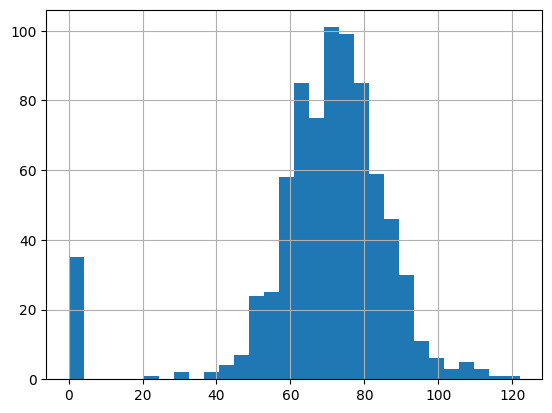

In [12]:
data['BloodPressure'].hist(bins=30) # Checking histogram of column 'BloodPressure'

In [13]:
data['BloodPressure'].median()

72.0

In [14]:
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].median()) # Replacing 0 values with median

<Axes: >

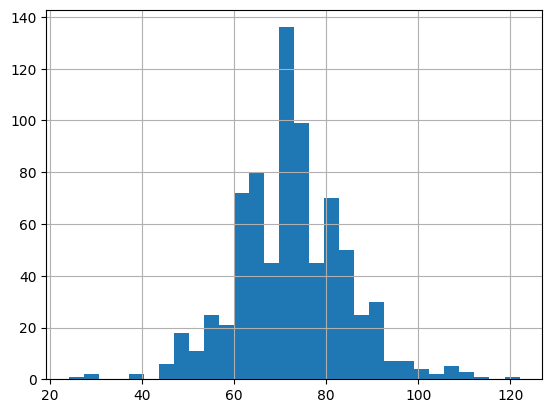

In [15]:
data['BloodPressure'].hist(bins=30)



# *   *'SkinThickness'*



<Axes: >

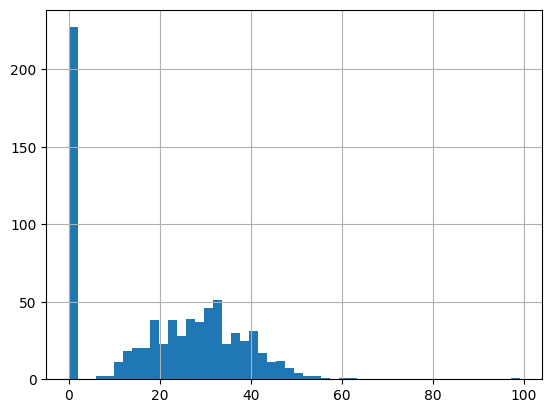

In [16]:
data['SkinThickness'].hist(bins=50) # Checking histogram of column 'SkinThickness'

In [17]:
print('Median - ',data['SkinThickness'].median())
print('Mean - ',data['SkinThickness'].mean())

Median -  23.0
Mean -  20.536458333333332


In [18]:
data['SkinThickness'] = data['SkinThickness'].replace(0,30) # According to the histogram '30' can be a better value to replace 0s with.

<Axes: >

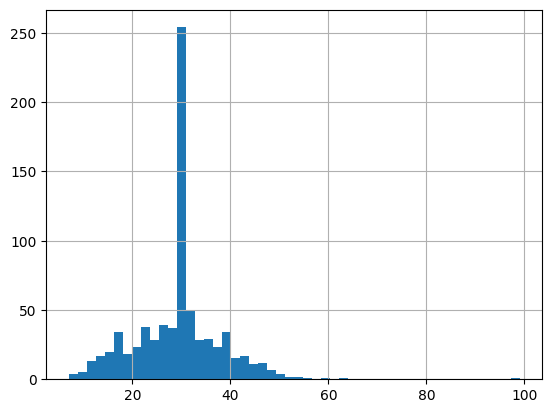

In [19]:
data['SkinThickness'].hist(bins=50)



# *   *'Insulin'*



<Axes: >

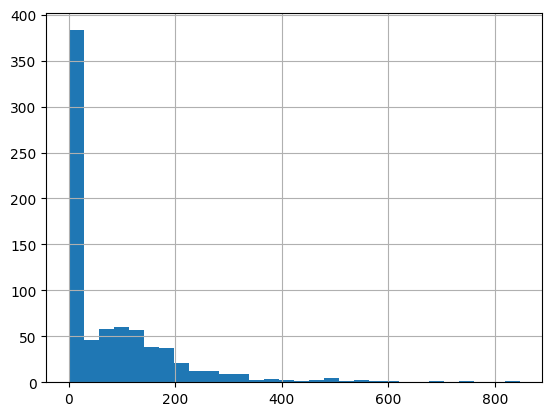

In [21]:
data['Insulin'].hist(bins=30) # Checking histogram of column 'Insulin'

{'whiskers': [<matplotlib.lines.Line2D at 0x7a0e0776be50>,
 'caps': [<matplotlib.lines.Line2D at 0x7a0e0776ab00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a0e0776be20>],
 'medians': [<matplotlib.lines.Line2D at 0x7a0e0776a050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a0e07769a80>],
 'means': []}

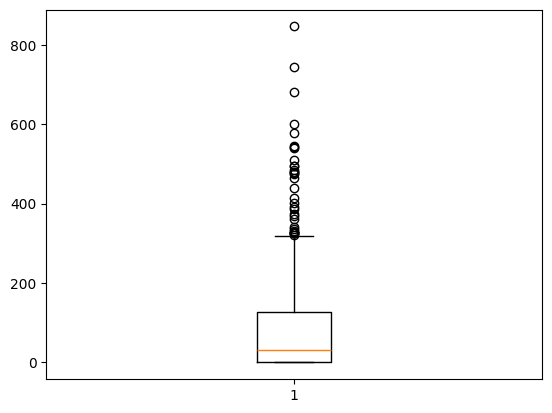

In [24]:
plt.boxplot(data['Insulin'])

In [27]:
data['Insulin'].median()

30.5

In [31]:
data[data['Insulin']>600].value_counts()

,,,,,,,,,count
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,
0,165,90,33,680,52.3,0.427,23,0,1
1,189,60,23,846,30.1,0.398,59,1,1
4,197,70,39,744,36.7,2.329,31,0,1


In [33]:
data = data[data['Insulin']<=600]

In [34]:
data['Insulin'].median()

25.0

In [37]:
data['Insulin'].describe()

,Insulin
count,765.000000
mean,77.145098
std,107.279598
min,0.000000
25%,0.000000
50%,25.000000
75%,126.000000
max,600.000000


In [38]:
data[data['Insulin']>500].value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            181      88             44             510      43.3  0.222                     26   1          1
1            172      68             49             579      42.4  0.702                     28   1          1
2            155      52             27             540      38.7  0.240                     25   1          1
             197      70             45             543      30.5  0.158                     53   1          1
5            155      84             44             545      38.7  0.619                     34   0          1
8            124      76             24             600      28.7  0.687                     52   1          1
Name: count, dtype: int64

In [39]:
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean()) # Replacing 0 values with mean

<ipython-input-39-319840c76da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean()) # Replacing 0 values with mean


<Axes: >

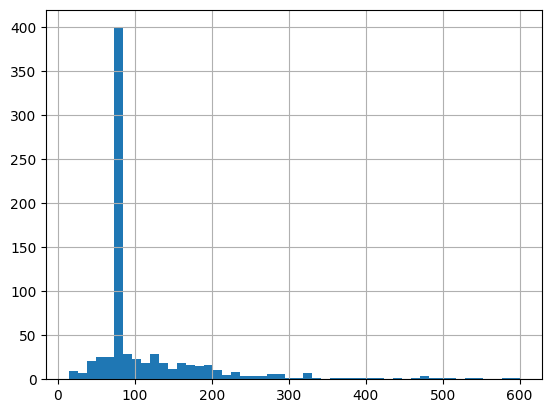

In [41]:
data['Insulin'].hist(bins = 50)

In [42]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,3.853595,121.413072,72.383007,29.394771,114.860479,31.962353,0.469604,33.223529,0.349020
std,3.371734,30.236448,12.094998,8.805845,84.683146,7.863185,0.325085,11.740250,0.476972
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,77.145098,27.300000,0.243000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,77.145098,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,600.000000,67.100000,2.420000,81.000000,1.000000




# *  *'BMI'*



<Axes: >

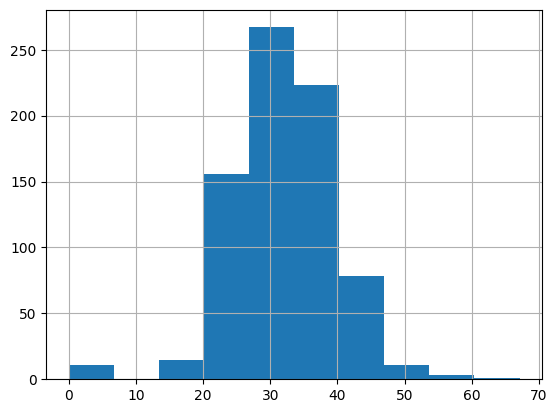

In [43]:
data['BMI'].hist()

In [44]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean()) # Replacing 0 values with mean

<ipython-input-44-7155190a8d40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BMI'] = data['BMI'].replace(0,data['BMI'].mean()) # Replacing 0 values with mean


<Axes: >

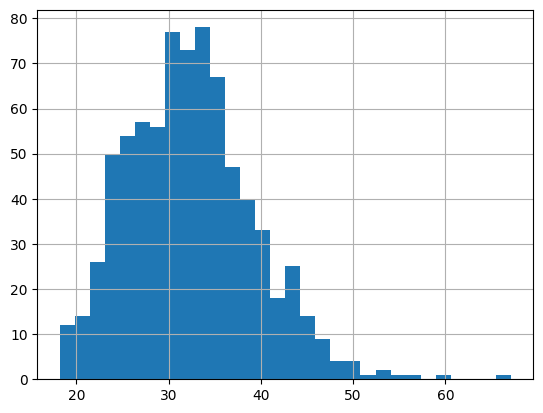

In [46]:
data['BMI'].hist(bins=30)

In [49]:
data[data['BMI']>60].value_counts()

,,,,,,,,,count
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,
0,129,110,46,130.0,67.1,0.319,26,1,1


# *'DiabetesPedigreeFunction' and 'Age' column doesnot have 0 values*

# *Also there is no need of encoding in this dataset.*

In [50]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,77.145098,33.6,0.627,50,1
1,1,85,66,29,77.145098,26.6,0.351,31,0
2,8,183,64,30,77.145098,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1


# x and y splitting

In [51]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

# Train data - Test data splitting

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [54]:
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred)

array([[96, 10],
       [17, 30]])

In [56]:
print('accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

accuracy_score =  0.8235294117647058
Precision =  0.75
Recall_score =  0.6382978723404256
f1 score =  0.6896551724137931


# Logistic Regression with Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [58]:
lg_sc = LogisticRegression()
lg_sc.fit(x_train_sc,y_train)
y_pred_sc = lg_sc.predict(x_test_sc)
confusion_matrix(y_test,y_pred_sc)

array([[95, 11],
       [13, 34]])

In [59]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred_sc))
print('Precision = ',precision_score(y_test,y_pred_sc))
print('Recall_score = ',recall_score(y_test,y_pred_sc))
print('f1 score = ',f1_score(y_test,y_pred_sc))

accuracy_score =  0.8431372549019608
Precision =  0.7555555555555555
Recall_score =  0.723404255319149
f1 score =  0.7391304347826086


# kNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
metrik_k = []
for k in range(3,15):
  classifier = KNeighborsClassifier(k)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metrik_k.append(acc)
metrik_k

[0.7647058823529411,
 0.7450980392156863,
 0.7581699346405228,
 0.8104575163398693,
 0.7777777777777778,
 0.8104575163398693,
 0.7908496732026143,
 0.803921568627451,
 0.803921568627451,
 0.8169934640522876,
 0.803921568627451,
 0.803921568627451]

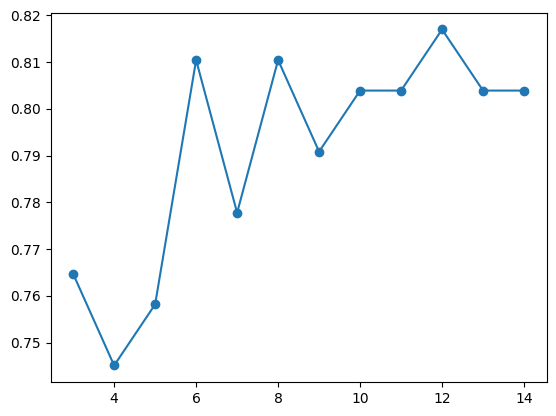

In [67]:
plt.plot(range(3,15),metrik_k,'o-')

In [68]:
classifier = KNeighborsClassifier(12) # k=12 gives the maximum accuracy
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[92, 14],
       [14, 33]])

In [69]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

accuracy_score =  0.8169934640522876
Precision =  0.7021276595744681
Recall_score =  0.7021276595744681
f1 score =  0.7021276595744681


# kNN with Scaling

In [70]:
classifier_sc = KNeighborsClassifier(12) # k=12 gives the maximum accuracy
classifier_sc.fit(x_train_sc,y_train)
y_pred_sc = classifier_sc.predict(x_test_sc)
confusion_matrix(y_test,y_pred_sc)

array([[95, 11],
       [20, 27]])

In [71]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred_sc))
print('Precision = ',precision_score(y_test,y_pred_sc))
print('Recall_score = ',recall_score(y_test,y_pred_sc))
print('f1 score = ',f1_score(y_test,y_pred_sc))

Accuracy_score =  0.7973856209150327
Precision =  0.7105263157894737
Recall_score =  0.574468085106383
f1 score =  0.6352941176470588


# Support Vector Machine

In [72]:
from sklearn.svm import SVC
sv = SVC()

In [73]:
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[96, 10],
       [18, 29]])

In [74]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy_score =  0.8169934640522876
Precision =  0.7435897435897436
Recall_score =  0.6170212765957447
f1 score =  0.6744186046511628


# Support Vector Machine with scaling

In [75]:
sv_sc = SVC()
sv_sc.fit(x_train_sc,y_train)
y_pred_sc = sv_sc.predict(x_test_sc)
confusion_matrix(y_test,y_pred_sc)

array([[91, 15],
       [16, 31]])

In [76]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred_sc))
print('Precision = ',precision_score(y_test,y_pred_sc))
print('Recall_score = ',recall_score(y_test,y_pred_sc))
print('f1 score = ',f1_score(y_test,y_pred_sc))

Accuracy_score =  0.7973856209150327
Precision =  0.6739130434782609
Recall_score =  0.6595744680851063
f1 score =  0.6666666666666666


# Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[89, 17],
       [16, 31]])

In [78]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy_score =  0.7843137254901961
Precision =  0.6458333333333334
Recall_score =  0.6595744680851063
f1 score =  0.6526315789473685


# Naive Bayes with Scaling

In [79]:
gnb_sc = GaussianNB()
gnb_sc.fit(x_train_sc,y_train)
y_pred_sc = gnb_sc.predict(x_test_sc)
confusion_matrix(y_test,y_pred_sc)

array([[86, 20],
       [16, 31]])

In [80]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred_sc))
print('Precision = ',precision_score(y_test,y_pred_sc))
print('Recall_score = ',recall_score(y_test,y_pred_sc))
print('f1 score = ',f1_score(y_test,y_pred_sc))

Accuracy_score =  0.7647058823529411
Precision =  0.6078431372549019
Recall_score =  0.6595744680851063
f1 score =  0.6326530612244898


# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[83, 23],
       [15, 32]])

In [83]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy_score =  0.7516339869281046
Precision =  0.5818181818181818
Recall_score =  0.6808510638297872
f1 score =  0.6274509803921569


# Decision Tree with default criterion, which is 'gini'

In [84]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[79, 27],
       [11, 36]])

In [85]:
print('Accuracy_score = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall_score = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy_score =  0.7516339869281046
Precision =  0.5714285714285714
Recall_score =  0.7659574468085106
f1 score =  0.6545454545454545


# Based on the result,the best classifier for the dataset is Logistic Regression with scaling.